<a href="https://colab.research.google.com/github/EdVKu/Econophysics_Projects/blob/main/Ej6_PowerMap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.linalg import sqrtm

In [ ]:
path = '/content/drive/MyDrive/Classroom/TSFMT-II(2024-1) Física/Nikkei-2010-2012.csv'
nikei = pd.read_csv(path, index_col="Ticker")
nikei = nikei.drop_duplicates()
nikei = nikei.dropna()

In [ ]:

d = nikei.to_numpy()

rends = (d[:,1:]-d[:,:-1])/d[:,:-1]
epochs = [rends[:,20*n:20*(n+1)] for n in range(int(len(rends)/20) + 1)]
Crisis = rends[:,20*5:20*(5+1)]
Calma = rends[:,20*9:20*(9+1)]


In [ ]:
epochs[5]

array([[ 0.00910125,  0.00338219, -0.02134831, ...,  0.00351288,
        -0.00933489, -0.00353357],
       [ 0.02245707, -0.00904393, -0.02216428, ...,  0.00129366,
         0.00129199, -0.01419355],
       [ 0.01201923,  0.00746516, -0.01178848, ...,  0.00493421,
        -0.00981997, -0.01157025],
       ...,
       [ 0.        , -0.00513779, -0.00469484, ..., -0.00138376,
        -0.00092379, -0.00092464],
       [-0.00724638, -0.00243309, -0.00243902, ..., -0.00484262,
         0.00729927, -0.02173913],
       [ 0.0031348 ,  0.        , -0.00625   , ...,  0.00310559,
         0.00309598, -0.01234568]])

In [ ]:
corr_calma = np.corrcoef(Calma)
eigs_calma = np.linalg.eigvals(corr_calma)
corr_crisis = np.corrcoef(Crisis)
eigs_crisis = np.linalg.eigvals(corr_crisis)

/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:852: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:905: ComplexWarning: Casting complex values to real discards the imaginary part
  db = np.array(np.diff(bin_edges), float)
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:6793: ComplexWarning: Casting complex values to real discards the imaginary part
  bins = np.array(bins, float)  # causes problems if float16


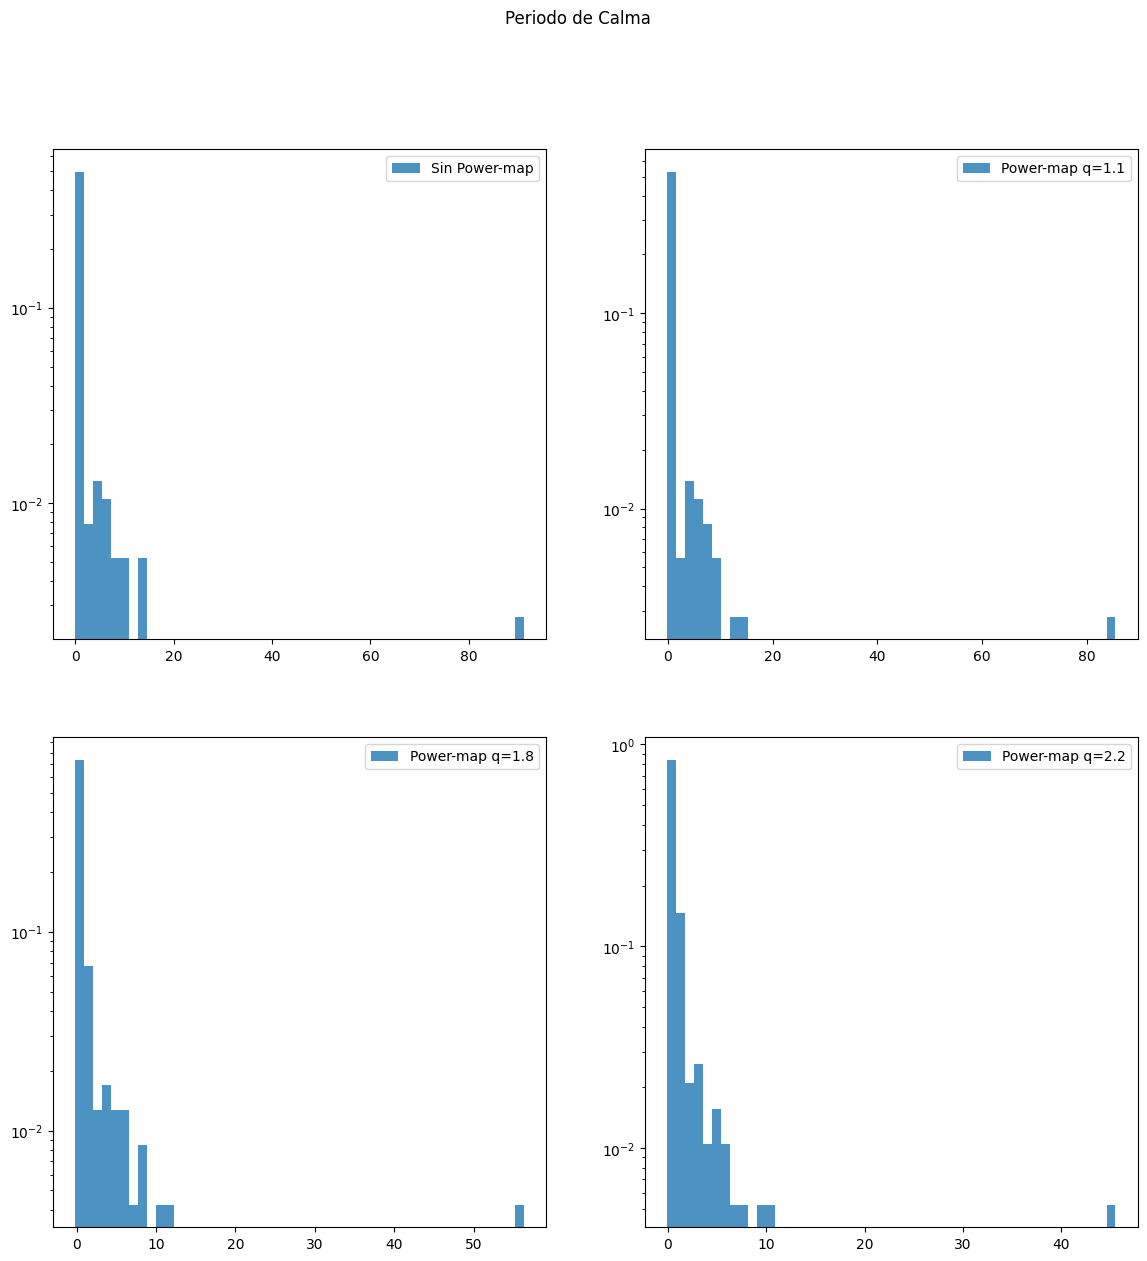

In [ ]:
q = [1.1,1.8,2.2]
PM_calma = [np.sign(corr_calma)*np.abs(corr_calma)**i for i in q]
plt.figure(figsize=(14,14))
plt.suptitle("Periodo de Calma")
plt.subplot(2,2,1)
plt.hist(eigs_calma,bins=50,alpha=0.8,density=True,label="Sin Power-map")
plt.yscale("log")
plt.legend()
plt.subplot(2,2,2)
plt.hist(np.linalg.eigvals(PM_calma[0]),bins=50,alpha=0.8,density=True,label="Power-map q=1.1")
plt.yscale("log")
plt.legend()
plt.subplot(2,2,3)
plt.hist(np.linalg.eigvals(PM_calma[1]),bins=50,alpha=0.8,density=True,label="Power-map q=1.8")
plt.yscale("log")
plt.legend()
plt.subplot(2,2,4)
plt.hist(np.linalg.eigvals(PM_calma[2]),bins=50,alpha=0.8,density=True,label="Power-map q=2.2")
plt.yscale("log")
plt.legend()
plt.show()

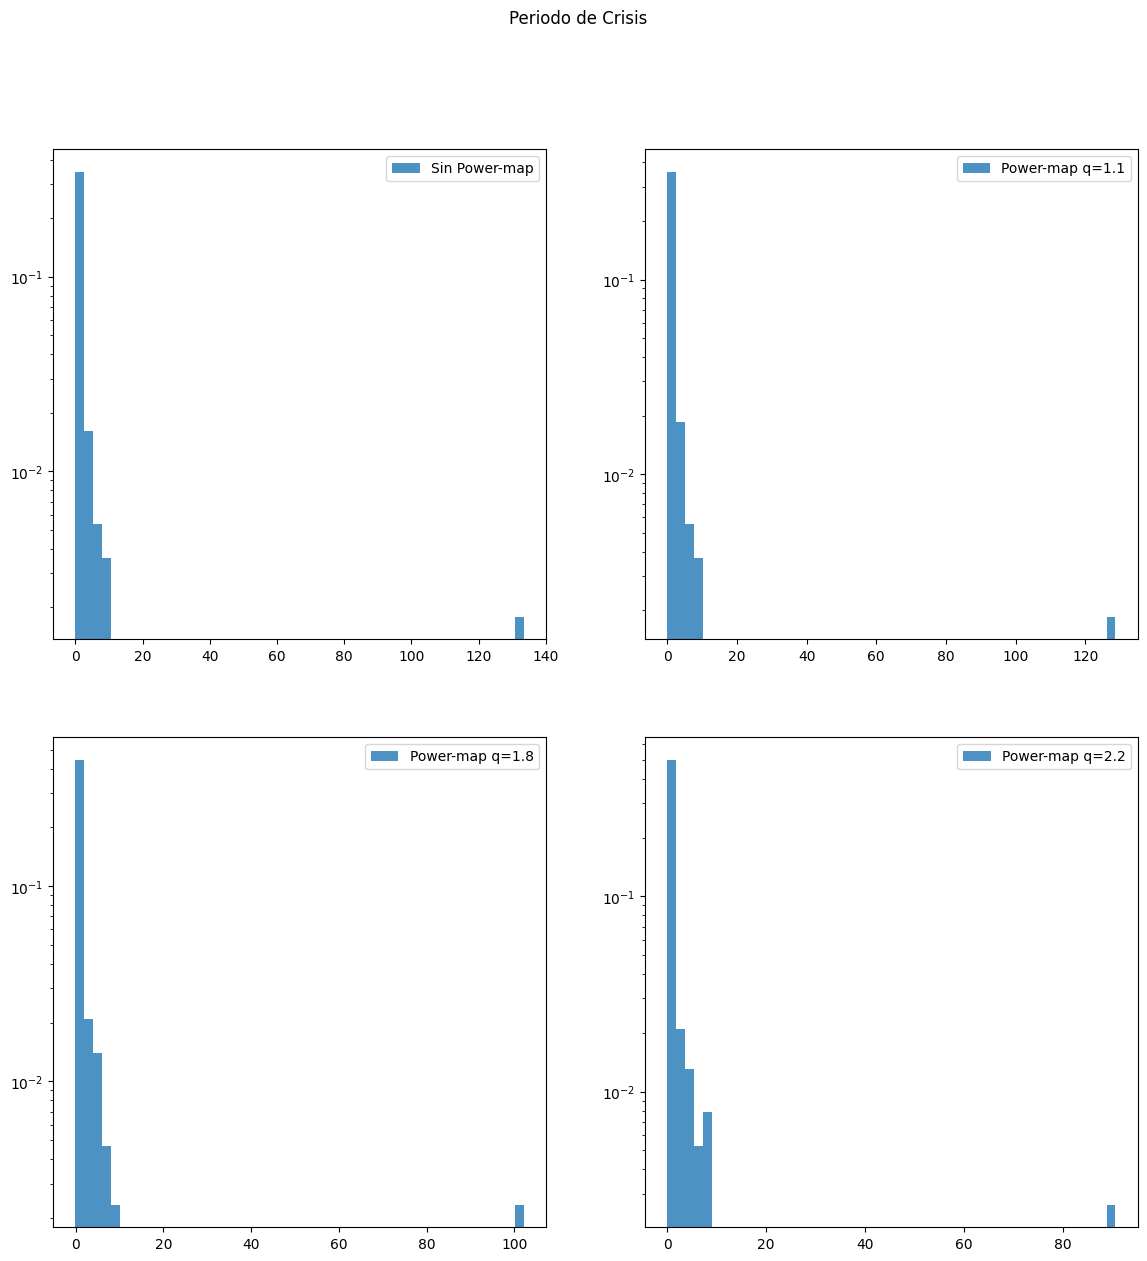

In [ ]:
q = [1.1,1.8,2.2]
PM_crisis = [np.sign(corr_crisis)*np.abs(corr_crisis)**i for i in q]
plt.figure(figsize=(14,14))
plt.suptitle("Periodo de Crisis")
plt.subplot(2,2,1)
plt.hist(eigs_crisis,bins=50,alpha=0.8,density=True,label="Sin Power-map")
plt.yscale("log")
plt.legend()
plt.subplot(2,2,2)
plt.hist(np.linalg.eigvals(PM_crisis[0]),bins=50,alpha=0.8,density=True,label="Power-map q=1.1")
plt.yscale("log")
plt.legend()
plt.subplot(2,2,3)
plt.hist(np.linalg.eigvals(PM_crisis[1]),bins=50,alpha=0.8,density=True,label="Power-map q=1.8")
plt.yscale("log")
plt.legend()
plt.subplot(2,2,4)
plt.hist(np.linalg.eigvals(PM_crisis[2]),bins=50,alpha=0.8,density=True,label="Power-map q=2.2")
plt.yscale("log")
plt.legend()
plt.show()

In [ ]:
Crisis[2]

array([ 0.01201923,  0.00746516, -0.01178848, -0.00886164, -0.00687758,
        0.01038781,  0.01130918,  0.00779393,  0.00269004,  0.00469482,
        0.00133509,  0.005     ,  0.01160862,  0.00327869, -0.00980392,
        0.00990099, -0.00653595,  0.00493421, -0.00981997, -0.01157025])

In [ ]:
np.std(Crisis)

0.021188518056124605

In [ ]:
np.std(Calma)

0.018330969394377675

Notamos que los datos en épocas de crisis tienen mayor desviación estándar que en las épocas de calma.